In [72]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }</style>"))
display(HTML("<style>.output_result {max-width: 100% !important; }</style>"))

import pandas as pd
pd.set_option('display.max_columns', 100, "display.max_rows", 50)
import numpy as np

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

#
from gensim.parsing.preprocessing import remove_stopwords # 
import string as st # string.punctuations

import nltk
nltk.download('punkt')

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from fuzzywuzzy import fuzz

import webcolors

import os
os.chdir('D:/Collection_Dataset/Data')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\willi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df_products = pd.read_excel('product_description_2021-11-30.xlsx')

df_products

,Public Food Key,Food Profile ID,Derivation,Name,Description,Scientific Name,Sampling details,Nitrogen Factor,Fat Factor,Specific Gravity,Analysed portion,Unanalysed portion,Classification ID,Classification Name
0,F002258,10995,Borrowed,"Cardamom seed, dried, ground",Ground spice commonly used in Indian cooking a...,Elettaria cardamom,The majority of nutrient data were borrowed fr...,6.25,0.956,0.0,1,0,31302,Herbs(dried) and spices
1,F002893,11014,Borrowed,"Chilli (chili), dried, ground","Dried and ground red pepper, characterised by ...",Capsicum spp,The majority of nutrient data was borrowed USD...,6.25,0.800,0.0,1,0,31302,Herbs(dried) and spices
2,F002963,10996,Borrowed,"Cinnamon, dried, ground",Dried and ground bark or quills of Cinnamomum ...,"Cinnamomum verum, C zeylanicum or C. aromaticum",The majority of nutrient data were borrowed fr...,6.25,0.956,0.0,1,0,31302,Herbs(dried) and spices
3,F002970,10997,Borrowed,"Cloves, dried, ground","Dried and ground, unopened flower buds of Syzy...",Syzygium aromaticum,The majority of nutrient data were borrowed fr...,6.25,0.956,0.0,1,0,31302,Herbs(dried) and spices
4,F003190,10998,Borrowed,"Coriander seed, dried, ground",Dried and ground fruit or seed of Coriandrum s...,Coriandrum sativum,The majority of nutrient data were borrowed fr...,6.25,0.956,0.0,1,0,31302,Herbs(dried) and spices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,F009774,13387,Recipe,"Zucchini, green skin, fresh, unpeeled, fried, ...","A variety of summer squash, picked when small....",Cucurbita pepo,These nutrient data were derived using a recip...,0.00,0.000,0.0,"93% (flesh, skin, seeds)","7% (stalk, ends)",24702,Squash and zucchini
1530,F009773,13388,Recipe,"Zucchini, green skin, fresh, unpeeled, boiled,...","Variety of marrow or summer squash, picked whe...",Cucurbita pepo,These nutrient data were derived using a recip...,0.00,0.000,0.0,"93% (flesh, skin, seeds)","7% (stalk, ends)",24702,Squash and zucchini
1531,F009766,13384,Analysed,"Zucchini, golden, fresh, unpeeled, raw",Variety of squash which has a yellow smooth sk...,Cucurbita pepo,The majority of nutrient data were derived fro...,6.25,0.800,0.0,"92% (flesh, skin, seeds)",8% (stalk ends),24702,Squash and zucchini
1532,F009765,13404,Recipe,"Zucchini, golden, fresh, unpeeled, fried, no a...",Variety of squash which has a yellow smooth sk...,NaN,These nutrient data were derived using a recip...,0.00,0.000,0.0,0.92,0.08,24702,Squash and zucchini


In [3]:
text_input = df_products['Name']

text_input

0                            Cardamom seed, dried, ground
1                           Chilli (chili), dried, ground
2                                 Cinnamon, dried, ground
3                                   Cloves, dried, ground
4                           Coriander seed, dried, ground
                              ...                        
1529    Zucchini, green skin, fresh, unpeeled, fried, ...
1530    Zucchini, green skin, fresh, unpeeled, boiled,...
1531               Zucchini, golden, fresh, unpeeled, raw
1532    Zucchini, golden, fresh, unpeeled, fried, no a...
1533    Zucchini, golden, fresh, unpeeled, boiled, dra...
Name: Name, Length: 1534, dtype: object

In [22]:
# use "remove_stopwords" to remove pronouns such as "me", "myself", "their", etc.

# translate() function requires a dictionaty input, which is generated from maketrans() function
    # e.g. maketrans('string1', 'string2', 'string in the 3rd argument would be made empty')
    # e.g. translate function does the actual conversion based on the dictionary created

text_cleaned = [remove_stopwords(i)\
                .translate(''.maketrans('', '', st.punctuation))\
                .translate(''.maketrans('', '', st.digits))\
                for i in text_input]

text_cleaned 

['Cardamom seed dried ground',
 'Chilli chili dried ground',
 'Cinnamon dried ground',
 'Cloves dried ground',
 'Coriander seed dried ground',
 'Cumin cummin seed dried ground',
 'Curry powder',
 'Fenugreek seed dried',
 'Ginger dried ground',
 'Mustard powder',
 'Nutmeg dried ground',
 'Oregano dried',
 'Paprika dry powder',
 'Pepper black ground',
 'Rosemary dried',
 'Sage dried',
 'Thyme dried ground',
 'Turmeric dried ground',
 'Salt substitute potassium chloride',
 'Salt table iodised',
 'Salt table noniodised',
 'Stock dry powder cube',
 'Taco seasoning mix chillibased',
 'Baking powder dry powder',
 'Baking soda bicarbonate dry powder',
 'Cream tartar dry powder',
 'Gelatine types',
 'Gluten wheat vital wheat gluten',
 'Starch potato',
 'Vanilla artificial imitation',
 'Vanilla bean extract',
 'Yeast dry powder',
 'Beer high alcohol  vv  above',
 'Beer strength alcohol  vv',
 'Beer strength alcohol  vv carbohydrate modified',
 'Beer midstrength alcohol  vv',
 'Beer light alcohol

In [24]:
def stemSentence(sentence):
    
    porter = PorterStemmer() # e.g. both "apple" and "apples" would be converted into "appl" and treated as the same word
    
    token_words = word_tokenize(sentence) # split a sentence into individual words
    
    stem_sentence = [porter.stem(word) for word in token_words]
    
    return ' '.join(stem_sentence)

text_processed = pd.Series([stemSentence(i) for i in text_cleaned])

text_processed

0                          cardamom seed dri ground
1                           chilli chili dri ground
2                               cinnamon dri ground
3                                  clove dri ground
4                           coriand seed dri ground
                           ...                     
1529    zucchini green skin fresh unpeel fri ad fat
1530    zucchini green skin fresh unpeel boil drain
1531               zucchini golden fresh unpeel raw
1532        zucchini golden fresh unpeel fri ad fat
1533        zucchini golden fresh unpeel boil drain
Length: 1534, dtype: object

In [35]:
list_colors = list(webcolors.CSS3_NAMES_TO_HEX)

list_color = [stemSentence(i) for i in list_colors if i not in ('chocolate', 'orange', 'wheat')]

text_processed = [' '.join([i for i in j.split() if i not in list_colors]) for j in text_processed]

text_processed

['cardamom seed dri ground',
 'chilli chili dri ground',
 'cinnamon dri ground',
 'clove dri ground',
 'coriand seed dri ground',
 'cumin cummin seed dri ground',
 'curri powder',
 'fenugreek seed dri',
 'ginger dri ground',
 'mustard powder',
 'nutmeg dri ground',
 'oregano dri',
 'paprika dri powder',
 'pepper ground',
 'rosemari dri',
 'sage dri',
 'thyme dri ground',
 'turmer dri ground',
 'salt substitut potassium chlorid',
 'salt tabl iodis',
 'salt tabl noniodis',
 'stock dri powder cube',
 'taco season mix chillibas',
 'bake powder dri powder',
 'bake soda bicarbon dri powder',
 'cream tartar dri powder',
 'gelatin type',
 'gluten vital gluten',
 'starch potato',
 'vanilla artifici imit',
 'vanilla bean extract',
 'yeast dri powder',
 'beer high alcohol vv abov',
 'beer strength alcohol vv',
 'beer strength alcohol vv carbohydr modifi',
 'beer midstrength alcohol vv',
 'beer light alcohol vv',
 'alcohol beverag spirit approxim vv brandi gin rum vodka whiski',
 'alcohol beverag 

In [36]:
df_check = pd.DataFrame({'Text_Input': text_input, 'Text_Processed': text_processed})

df_check

,Text_Input,Text_Processed
0,"Cardamom seed, dried, ground",cardamom seed dri ground
1,"Chilli (chili), dried, ground",chilli chili dri ground
2,"Cinnamon, dried, ground",cinnamon dri ground
3,"Cloves, dried, ground",clove dri ground
4,"Coriander seed, dried, ground",coriand seed dri ground
...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",zucchini skin fresh unpeel fri ad fat
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",zucchini skin fresh unpeel boil drain
1531,"Zucchini, golden, fresh, unpeeled, raw",zucchini golden fresh unpeel raw
1532,"Zucchini, golden, fresh, unpeeled, fried, no a...",zucchini golden fresh unpeel fri ad fat


In [45]:
vectorizer_cv = CountVectorizer(analyzer = 'word')

text_vectorized_cv = vectorizer_cv.fit_transform(text_processed)

text_vectorized_cv

<1534x846 sparse matrix of type '<class 'numpy.int64'>'
	with 7669 stored elements in Compressed Sparse Row format>

In [46]:
df_matrix = pd.concat([text_input, pd.DataFrame(text_vectorized_cv.toarray(), columns = vectorizer_cv.get_feature_names())], axis = 1)

df_matrix

,Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,almond,amaranth,anchovi,anzac,appl,approxim,apricot,aquacultur,arrowroot,artichok,artifici,asparagu,atlant,australian,avocado,babi,bacon,bake,balsam,bamboo,banana,bar,barbecu,barley,barramundi,bartlett,basa,base,basic,basil,bassa,batter,bbqd,bean,beef,beer,beetroot,berri,besan,beverag,...,unpeel,unprocess,unsalt,untoast,untrim,valencia,vanilla,varieti,veal,vegemit,veget,vegetarian,vein,vine,vinegar,vital,vitamin,vodka,vv,wafer,walnut,waltham,water,waterbas,watercress,watermelon,wattl,wax,western,wheatmeal,whiski,whole,wholem,wild,william,wine,wing,worcestershir,wrapper,yam,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini
0,"Cardamom seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Chilli (chili), dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"Cinnamon, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Cloves, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"Coriander seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1531,"Zucchini, golden, fresh, unpeeled, raw",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1532,"Zucchini, golden, fresh, unpeeled, fried, no a...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
vectorizer_tfidf = TfidfVectorizer(analyzer = 'word')

text_vectorized_tfidf = vectorizer_tfidf.fit_transform(text_processed)

In [42]:
df_matrix_tfidf = pd.concat([text_input, pd.DataFrame(text_vectorized_tfidf.toarray(), columns = vectorizer_tfidf.get_feature_names())], axis = 1)

df_matrix_tfidf

,Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,almond,amaranth,anchovi,anzac,appl,approxim,apricot,aquacultur,arrowroot,artichok,artifici,asparagu,atlant,australian,avocado,babi,bacon,bake,balsam,bamboo,banana,bar,barbecu,barley,barramundi,bartlett,basa,base,basic,basil,bassa,batter,bbqd,bean,beef,beer,beetroot,berri,besan,beverag,...,unpeel,unprocess,unsalt,untoast,untrim,valencia,vanilla,varieti,veal,vegemit,veget,vegetarian,vein,vine,vinegar,vital,vitamin,vodka,vv,wafer,walnut,waltham,water,waterbas,watercress,watermelon,wattl,wax,western,wheatmeal,whiski,whole,wholem,wild,william,wine,wing,worcestershir,wrapper,yam,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini
0,"Cardamom seed, dried, ground",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,"Chilli (chili), dried, ground",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,"Cinnamon, dried, ground",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,"Cloves, dried, ground",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,"Coriander seed, dried, ground",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0.0,0.0,0.0,0.213149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.441327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579040
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [43]:
vectorizer_ngrams = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2))

text_vectorized_ngrams = vectorizer_ngrams.fit_transform(text_processed)

In [44]:
df_matrix_ngrams = pd.concat([text_input, pd.DataFrame(text_vectorized_ngrams.toarray(), columns = vectorizer_ngrams.get_feature_names())], axis = 1)

df_matrix_ngrams

,Name,abalon,abalon lip,abov,acacia,acacia ground,ad,ad butter,ad ca,ad calcium,ad dri,ad fat,ad fe,ad fibr,ad iron,ad milk,ad omega,ad phytosterol,ad salt,ad sugar,ad vitamin,african,african pride,albumen,albumen hardboil,albumen raw,alcohol,alcohol approxim,alcohol beverag,alcohol vv,alfalfa,alfalfa fresh,allsort,almond,almond chocolateco,almond meal,almond skin,amaranth,amaranth grain,anchovi,anchovi can,anzac,anzac style,appl,appl african,appl alcohol,appl blackcurr,appl bonza,appl commerci,appl delici,...,wine cabernet,wine chardonnay,wine cook,wine fortifi,wine merlot,wine pinot,wine riesl,wine rose,wine sauvignon,wine semillon,wine shiraz,wine sparkl,wine sweet,wing,wing lean,worcestershir,worcestershir commerci,wrapper,wrapper soak,yam,yam wild,yeast,yeast dri,yeast marmit,yeast vegemit,yellowey,yellowey fillet,yellowfin,yellowfin flesh,yellowtail,yellowtail aquacultur,yoghurt,yoghurt apricot,yoghurt dessert,yoghurt natur,yoghurt soy,yoghurt strawberri,yoghurt vanilla,yoghurtco,yolk,yolk hardboil,yolk raw,young,young immatur,zn,zn jackaroo,zn vitamin,zucchini,zucchini golden,zucchini skin
0,"Cardamom seed, dried, ground",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,"Chilli (chili), dried, ground",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,"Cinnamon, dried, ground",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,"Cloves, dried, ground",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,"Coriander seed, dried, ground",0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0.0,0.0,0.0,0.0,0.0,0.128474,0.0,0.0,0.0,0.0,0.138404,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [59]:
# latent dirichlet allocation
lda = LatentDirichletAllocation( n_components = 30, learning_decay = 0.8)

lda_model = lda.fit(text_vectorized_cv)

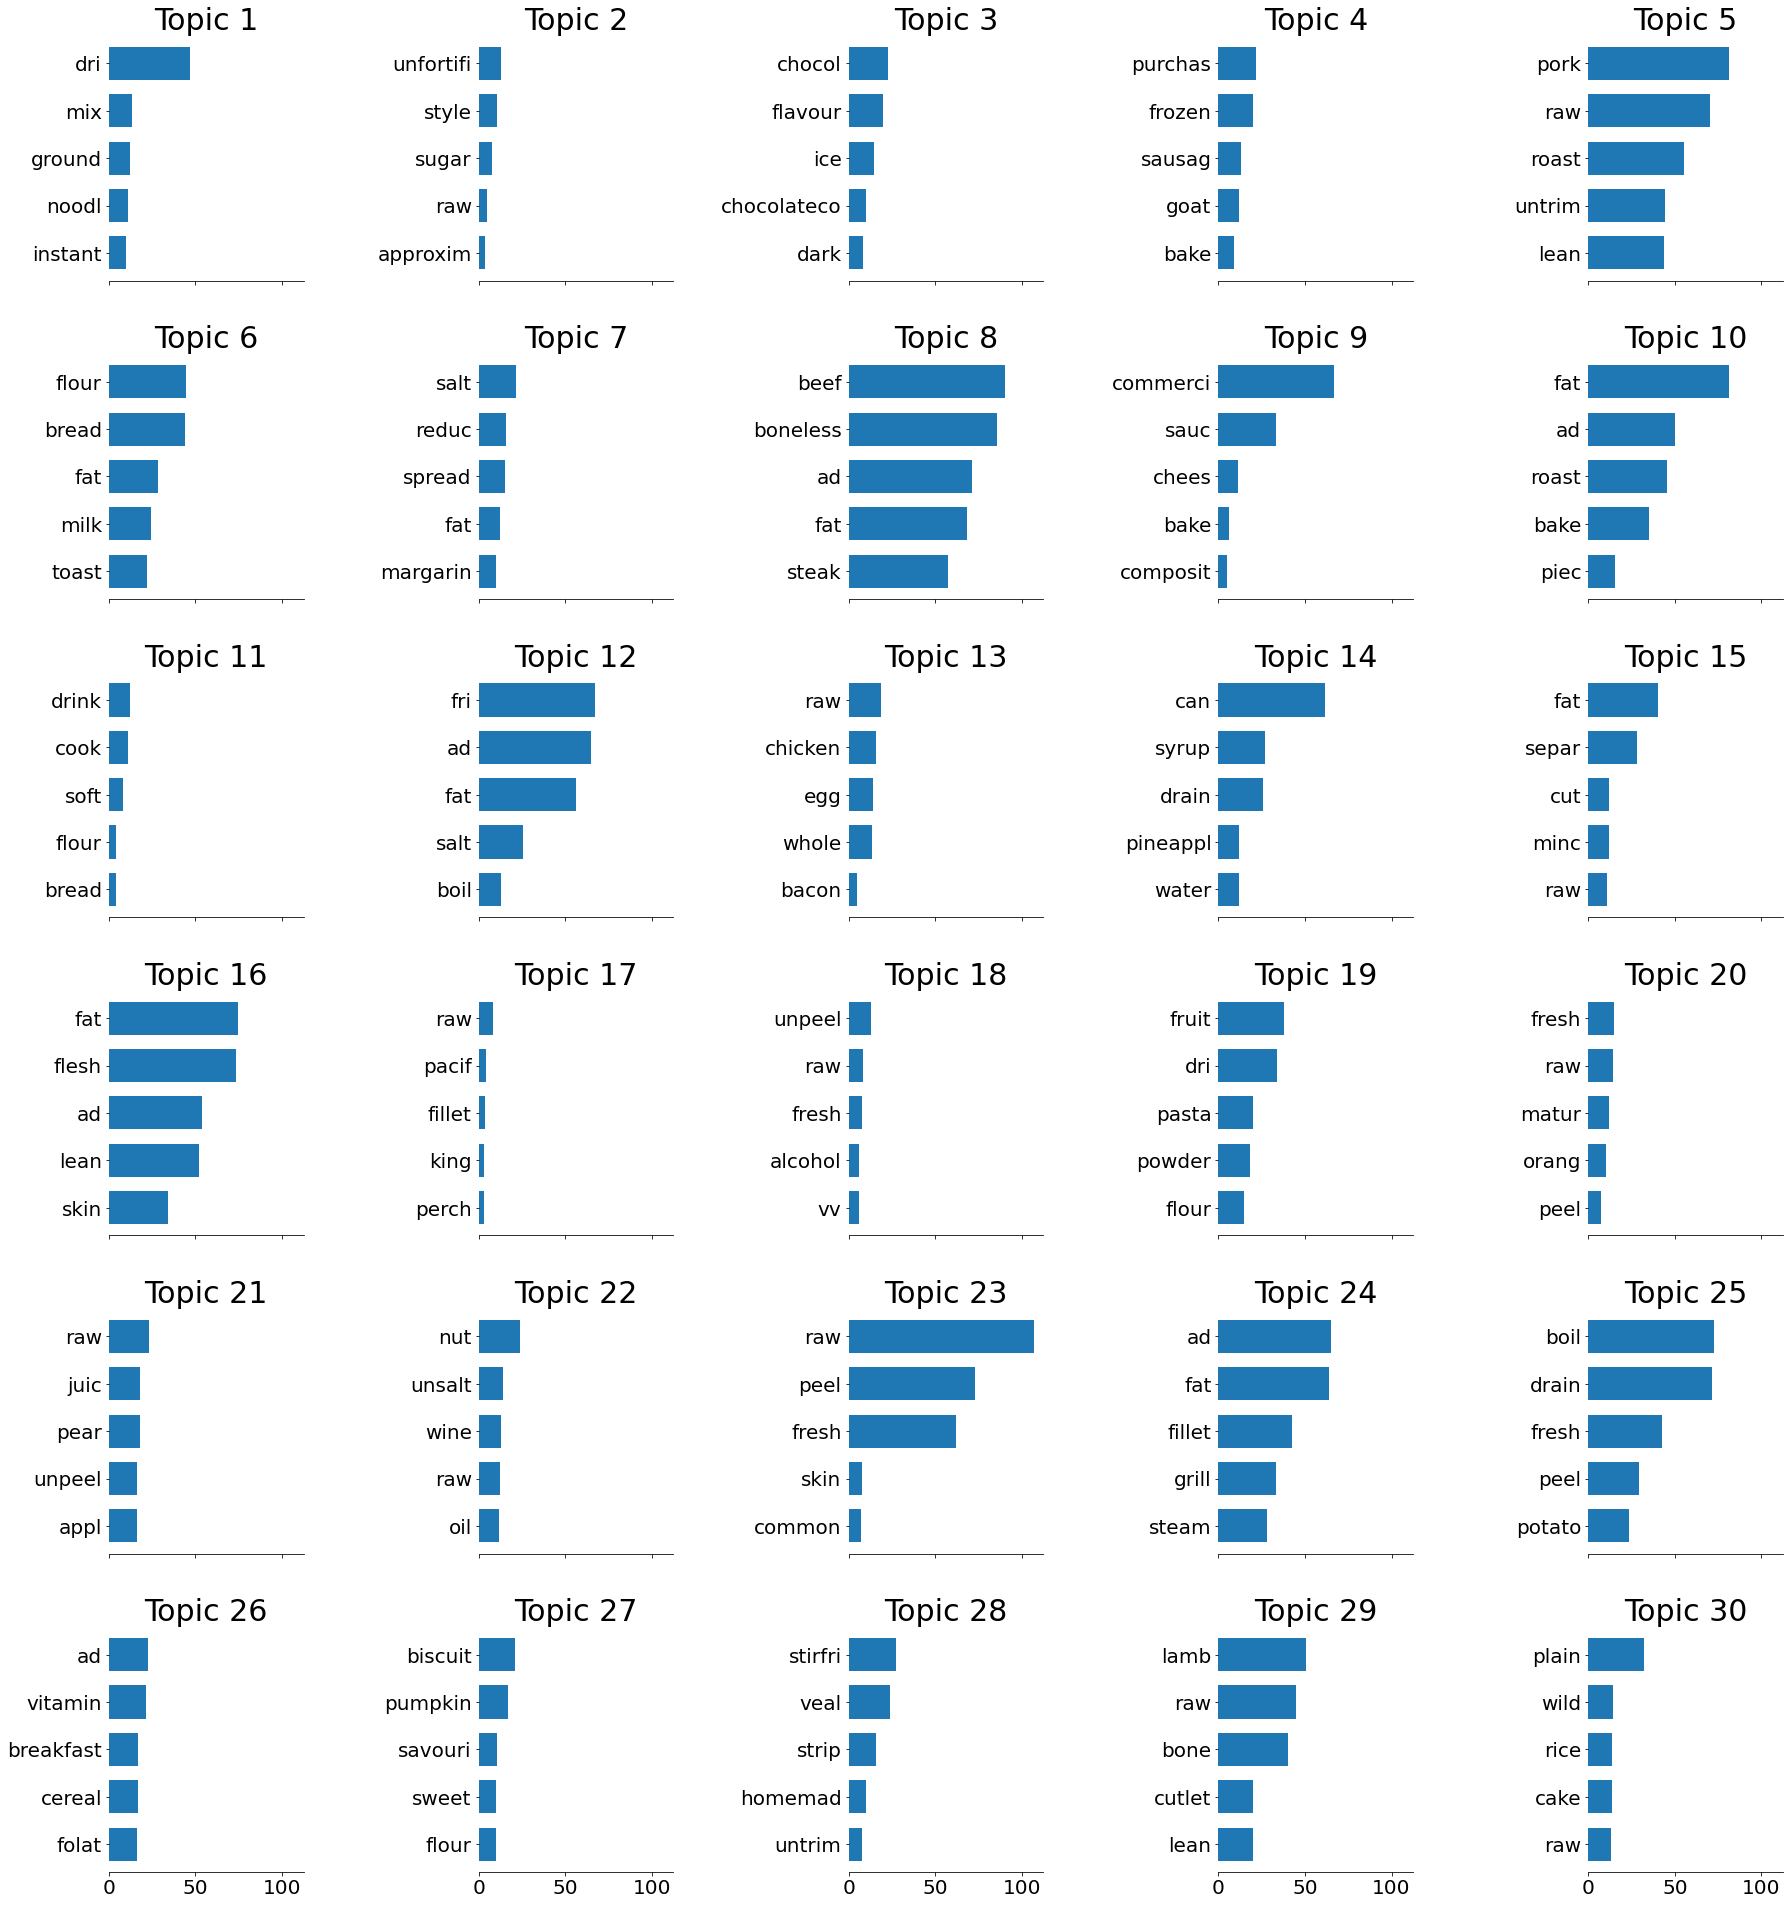

In [62]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    """
    
    """
    
    fig, axes = plt.subplots(6, 5, figsize = (30, 30), sharex = True)
    
    axes = axes.flatten() #
    
    for topic_index, topic in enumerate(model.components_):
        
#         print(topic_id, topic)
        
        top_features_index = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_index]
        
        weights = topic[top_features_index]
        
        ax = axes[topic_index]
        ax.barh(top_features, weights, height = 0.7)
        ax.set_title(f'Topic {topic_index + 1}', fontdict = {'fontsize': 30})
        
        ax.invert_yaxis()
        ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
        
        for i in 'top right left'.split():
            
            ax.spines[i].set_visible(False)
            
        fig.suptitle(title, fontsize = 40)
        
    #
    plt.subplots_adjust(top = 0.9, bottom = 0.05, wspace = 0.9, hspace = 0.3)
    plt.show()
    
n_top_words = 5
feature_names = vectorizer_cv.get_feature_names()

plot_top_words(lda_model, feature_names, n_top_words, '')

In [68]:
k_means = KMeans(n_clusters = 100)

k_means.fit(text_vectorized_cv)

result = pd.concat([text_input, pd.DataFrame(text_vectorized_cv.toarray(), columns = vectorizer_cv.get_feature_names())], axis = 1)

result['Cluster'] = k_means.predict(text_vectorized_cv)

result

,Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,almond,amaranth,anchovi,anzac,appl,approxim,apricot,aquacultur,arrowroot,artichok,artifici,asparagu,atlant,australian,avocado,babi,bacon,bake,balsam,bamboo,banana,bar,barbecu,barley,barramundi,bartlett,basa,base,basic,basil,bassa,batter,bbqd,bean,beef,beer,beetroot,berri,besan,beverag,...,unprocess,unsalt,untoast,untrim,valencia,vanilla,varieti,veal,vegemit,veget,vegetarian,vein,vine,vinegar,vital,vitamin,vodka,vv,wafer,walnut,waltham,water,waterbas,watercress,watermelon,wattl,wax,western,wheatmeal,whiski,whole,wholem,wild,william,wine,wing,worcestershir,wrapper,yam,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini,Cluster
0,"Cardamom seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Chilli (chili), dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,"Cinnamon, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"Cloves, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"Coriander seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,80
1531,"Zucchini, golden, fresh, unpeeled, raw",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,48
1532,"Zucchini, golden, fresh, unpeeled, fried, no a...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15


In [119]:
clusters = result['Cluster'].unique()

labels = []

for i in range(len(clusters)):
    
    subset = result[result['Cluster'] == clusters[i]] # get each subset that are classified into different clusters
    
    words = ' '.join([i for i in np.where(subset.all() != 0, subset.columns, None) if i and i != 'Name' and i != 'Cluster' and len(i.split()) == 1])
    
    labels.append(words)
    
labels_table = pd.DataFrame(zip(clusters, labels), columns = ['Cluster', 'Label'])

result_labelled = pd.merge(result, labels_table, on = 'Cluster', how = 'left')

result_labelled

,Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,almond,amaranth,anchovi,anzac,appl,approxim,apricot,aquacultur,arrowroot,artichok,artifici,asparagu,atlant,australian,avocado,babi,bacon,bake,balsam,bamboo,banana,bar,barbecu,barley,barramundi,bartlett,basa,base,basic,basil,bassa,batter,bbqd,bean,beef,beer,beetroot,berri,besan,beverag,...,unsalt,untoast,untrim,valencia,vanilla,varieti,veal,vegemit,veget,vegetarian,vein,vine,vinegar,vital,vitamin,vodka,vv,wafer,walnut,waltham,water,waterbas,watercress,watermelon,wattl,wax,western,wheatmeal,whiski,whole,wholem,wild,william,wine,wing,worcestershir,wrapper,yam,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini,Cluster,Label
0,"Cardamom seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
1,"Chilli (chili), dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
2,"Cinnamon, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
3,"Cloves, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
4,"Coriander seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,ad fri
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,80,drain fresh
1531,"Zucchini, golden, fresh, unpeeled, raw",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,48,fresh raw
1532,"Zucchini, golden, fresh, unpeeled, fried, no a...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,ad fri


In [120]:
pd.pivot_table(result_labelled, index = ['Label'], values = ['Name'], aggfunc = 'count').sort_values(['Name'], ascending = [False]).rename({'Name': 'Count of Names'}, axis = 1)

,Count of Names
Label,
,177
raw,131
ad fat,82
dri,73
peel raw,42
...,...
deep fast food fri oil outlet potato salt,3
blend deep fri outlet takeaway,3
ad fat fish frozen,3


In [123]:
result_labelled

,Name,abalon,abov,acacia,ad,african,albumen,alcohol,alfalfa,allsort,almond,amaranth,anchovi,anzac,appl,approxim,apricot,aquacultur,arrowroot,artichok,artifici,asparagu,atlant,australian,avocado,babi,bacon,bake,balsam,bamboo,banana,bar,barbecu,barley,barramundi,bartlett,basa,base,basic,basil,bassa,batter,bbqd,bean,beef,beer,beetroot,berri,besan,beverag,...,unsalt,untoast,untrim,valencia,vanilla,varieti,veal,vegemit,veget,vegetarian,vein,vine,vinegar,vital,vitamin,vodka,vv,wafer,walnut,waltham,water,waterbas,watercress,watermelon,wattl,wax,western,wheatmeal,whiski,whole,wholem,wild,william,wine,wing,worcestershir,wrapper,yam,yeast,yellowey,yellowfin,yellowtail,yoghurt,yoghurtco,yolk,young,zn,zucchini,Cluster,Label
0,"Cardamom seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
1,"Chilli (chili), dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
2,"Cinnamon, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
3,"Cloves, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
4,"Coriander seed, dried, ground",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,dri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,"Zucchini, green skin, fresh, unpeeled, fried, ...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,ad fri
1530,"Zucchini, green skin, fresh, unpeeled, boiled,...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,80,drain fresh
1531,"Zucchini, golden, fresh, unpeeled, raw",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,48,fresh raw
1532,"Zucchini, golden, fresh, unpeeled, fried, no a...",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,ad fri


In [124]:
result_labelled.loc[:, 'Category'] = result_labelled.apply(lambda x: 'Category 1' if x['Label'] == 'raw' else 'Category 2', axis = 1)

In [129]:
result_summary = pd.pivot_table(result_labelled, index = ['Label', 'Category'], values = ['Name'], aggfunc = 'count').reset_index().rename(columns = {'Name': 'Count'})

result_treemap = result_summary[(result_summary['Label'] != '') & (result_summary['Count'] >= 1)]

fig = px.treemap(result_treemap, path = ['Category', 'Label'], values = 'Count')
fig.show()